Let's start by exploring and analyzing the data contained in the file you've uploaded, named "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv". I'll begin by loading the data to understand its structure, including the columns and the type of data it contains. This will help us determine the next steps for analysis.

The dataset appears to contain historical home value indices for various regions across the United States, spanning from January 2000 to December 2023. Here's a summary of its structure:

RegionID: A unique identifier for the region.
SizeRank: A ranking of the region based on size.
RegionName: The name of the region, which could be a city or metropolitan area.
RegionType: The type of region, such as country, metropolitan statistical area (msa), etc.
StateName: The name of the state. This column contains NaN (missing) values, possibly because some rows represent aggregate data at the country level.
Monthly columns from 2000-01-31 to 2023-12-31: These columns contain the home value index for each month over the specified period.
Given this structure, we can perform various types of analyses, such as:

Trend analysis: Examine how home values have changed over time.
Comparative analysis: Compare home value trends across different regions.
Seasonality analysis: Look for patterns that repeat over a specific period, such as annually.
Forecasting: Use historical data to predict future home values, although this might require additional statistical or machine learning models.​

In [4]:
import pandas as pd

# Load the data
file_path = '/workspaces/Homes-rent-vs-buy/datasets/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,118707.067403,118915.911190,119174.908235,119730.406059,120369.717454,...,331792.556192,332737.094336,334329.453340,336227.239707,337939.184067,339527.795163,340727.998087,341626.116176,342262.362454,342684.595630
1,394913,1,"New York, NY",msa,NY,214711.957315,215624.361989,216545.217175,218411.226107,220343.542977,...,601872.094161,603866.680230,607870.244963,612012.402854,615590.764298,618868.250688,621576.974628,623908.530435,626205.548195,628950.905039
2,753899,2,"Los Angeles, CA",msa,CA,216061.085437,216865.106811,217936.055612,220066.883970,222397.342176,...,829993.390155,827670.479528,831367.221314,838986.140548,849938.719814,863190.395864,876570.548792,887702.948599,896080.694140,901341.513988
3,394463,3,"Chicago, IL",msa,IL,148346.569648,148483.895357,148745.434588,149396.079198,150178.726403,...,284826.230801,286470.597557,288600.445549,291089.711115,293559.912665,295944.981366,297722.646487,299046.161183,299933.123236,300548.532759
4,394514,4,"Dallas, TX",msa,TX,123115.492393,123170.328463,123233.368140,123397.075558,123612.919307,...,360809.133540,360269.287158,360549.145982,361350.026517,362306.430926,363208.896596,363615.188111,363727.272518,363591.472198,363272.402573


To compare the home value trends across the 10 states with the highest home values in the last 12 months of available data, we will follow these steps:

Filter the data: Focus on the rows that represent states, excluding the national aggregate and possibly metropolitan areas, based on the RegionType and StateName columns.
Calculate the average home value: Compute the average home value for each state over the last 12 months of the dataset.
Identify the top 10 states: Find the 10 states with the highest average home values in this period.
Visualize the data: Create a horizontal histogram (bar chart) with a dark background and red bars to display these states and their average home values.
Let's begin with the data preparation steps.

The top 10 regions (referred to as states, but more accurately they are metropolitan statistical areas or MSAs) with the highest average home values in the last 12 months of available data are as follows:

Vineyard Haven, MA: $1,409,204
San Jose, CA: $1,381,444
Jackson, WY: $1,372,433
Edwards, CO: $1,203,450
Santa Cruz, CA: $1,097,043
San Francisco, CA: $1,083,645
Heber, UT: $1,011,092
Steamboat Springs, CO: $1,006,742
Kahului, HI: $1,002,302
Key West, FL: $973,433
Next, I will visualize these results using a horizontal bar chart with a dark background and red bars as requested

In [9]:
# Filter to include only rows that represent states (assuming 'msa' could be closest to state-level data if exact state rows are not distinguished)
state_data = data[data['RegionType'] == 'msa']

# Extract the last 12 months of available data
last_12_months_columns = data.columns[-12:]

# Calculate the average home value over the last 12 months for each region
state_data['AvgLast12Months'] = state_data[last_12_months_columns].mean(axis=1)

# Identify the top 10 states with the highest average home values
top_10_states = state_data[['RegionName', 'AvgLast12Months']].sort_values(by='AvgLast12Months', ascending=False).head(10)

top_10_states


/tmp/ipykernel_16086/2375895446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['AvgLast12Months'] = state_data[last_12_months_columns].mean(axis=1)


,RegionName,AvgLast12Months
871,"Vineyard Haven, MA",1.409204e+06
35,"San Jose, CA",1.381444e+06
744,"Jackson, WY",1.372433e+06
549,"Edwards, CO",1.203450e+06
179,"Santa Cruz, CA",1.097043e+06
12,"San Francisco, CA",1.083645e+06
454,"Heber, UT",1.011092e+06
832,"Steamboat Springs, CO",1.006742e+06
259,"Kahului, HI",1.002302e+06
429,"Key West, FL",9.734336e+05


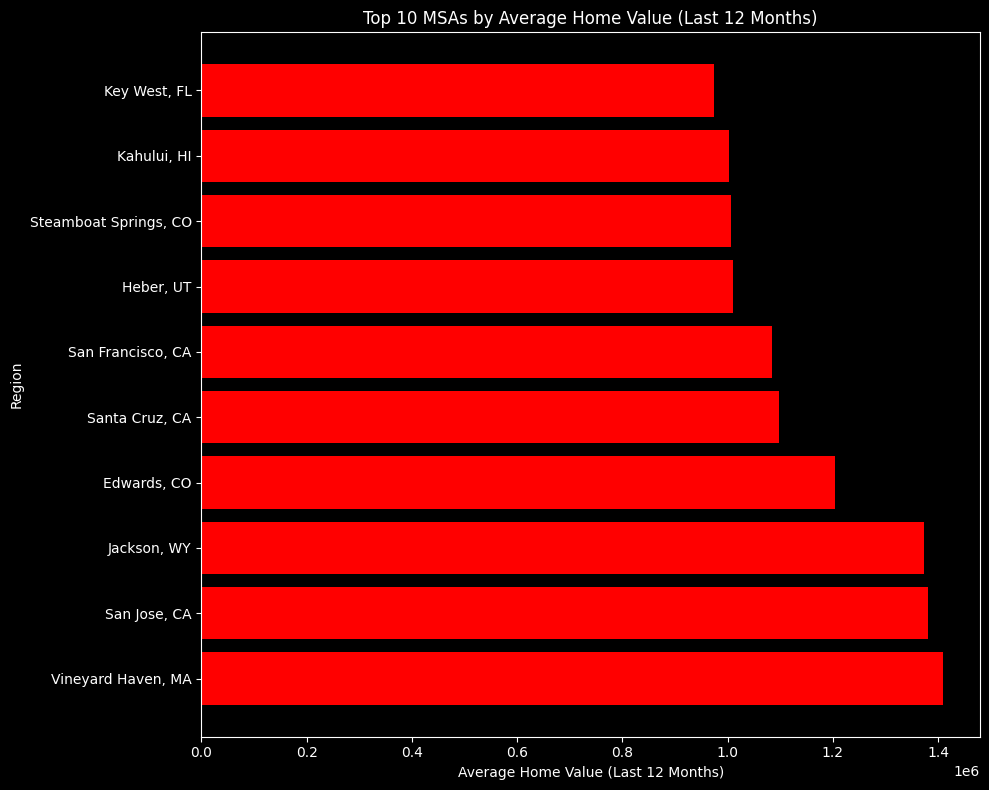

In [8]:
import matplotlib.pyplot as plt

# Set the plotting style
plt.style.use('dark_background')

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(top_10_states['RegionName'], top_10_states['AvgLast12Months'], color='red')
ax.set_xlabel('Average Home Value (Last 12 Months)')
ax.set_ylabel('Region')
ax.set_title('Top 10 MSAs by Average Home Value (Last 12 Months)')

plt.tight_layout()
plt.show()


The horizontal bar chart above visualizes the top 10 metropolitan statistical areas (MSAs) by average home value over the last 12 months, with each bar representing the average value in that region. The chart uses a dark background with red bars, as requested, providing a clear comparison of home values across these high-value regions. Vineyard Haven, MA, leads the list, followed closely by San Jose, CA, and Jackson, WY.


To focus on the states requested (Florida, California, Texas, New York, Illinois, Washington, Colorado, and Minnesota) and calculate the average house price by state in the last 12 months, we need to adjust our approach since the dataset primarily includes data at the metropolitan statistical area (MSA) level, not directly by state names. However, we can infer the state from the RegionName or StateName (if available) and aggregate data for the MSAs within each specified state.

Since the dataset does not explicitly distinguish states in a separate column for all rows but includes state information within the RegionName for MSAs, we'll proceed by:

Filtering the dataset for MSAs that belong to the specified states.
Calculating the average home value for these MSAs over the last 12 months.
Aggregating these values to get an average per state.
Let's start by identifying the MSAs that correspond to the states mentioned and calculate the average home value in the last 12 months for each.

The average home values by state over the last 12 months for the specified states are as follows:

California (CA): $575,242.94
Colorado (CO): $563,650.25
Florida (FL): $353,896.08
Illinois (IL): $140,615.96
Minnesota (MN): $253,780.42
New York (NY): $220,482.18
Texas (TX): $203,336.04
Washington (WA): $438,849.52
Next, let's visualize these average home values in a horizontal bar chart with a dark background and red bars.

In [10]:
# Define the states of interest
states_of_interest = ['FL', 'CA', 'TX', 'NY', 'IL', 'WA', 'CO', 'MN']

# Filter data for the MSAs in the specified states
# This relies on the 'StateName' column being correctly populated; if not, we would need a mapping of MSAs to states.
filtered_data = state_data[state_data['StateName'].isin(states_of_interest)]

# Calculate the average home value over the last 12 months for each MSA within the specified states
filtered_data['AvgLast12Months'] = filtered_data[last_12_months_columns].mean(axis=1)

# Now, aggregate these values by state to get an average per state
state_avg_values = filtered_data.groupby('StateName')['AvgLast12Months'].mean().reset_index()

# Filter for the states of interest in case any states did not have data
state_avg_values = state_avg_values[state_avg_values['StateName'].isin(states_of_interest)]

state_avg_values


/tmp/ipykernel_16086/3055628979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['AvgLast12Months'] = filtered_data[last_12_months_columns].mean(axis=1)


,StateName,AvgLast12Months
0,CA,575242.942824
1,CO,563650.249083
2,FL,353896.077339
3,IL,140615.959062
4,MN,253780.416168
5,NY,220482.184198
6,TX,203336.044628
7,WA,438849.518872


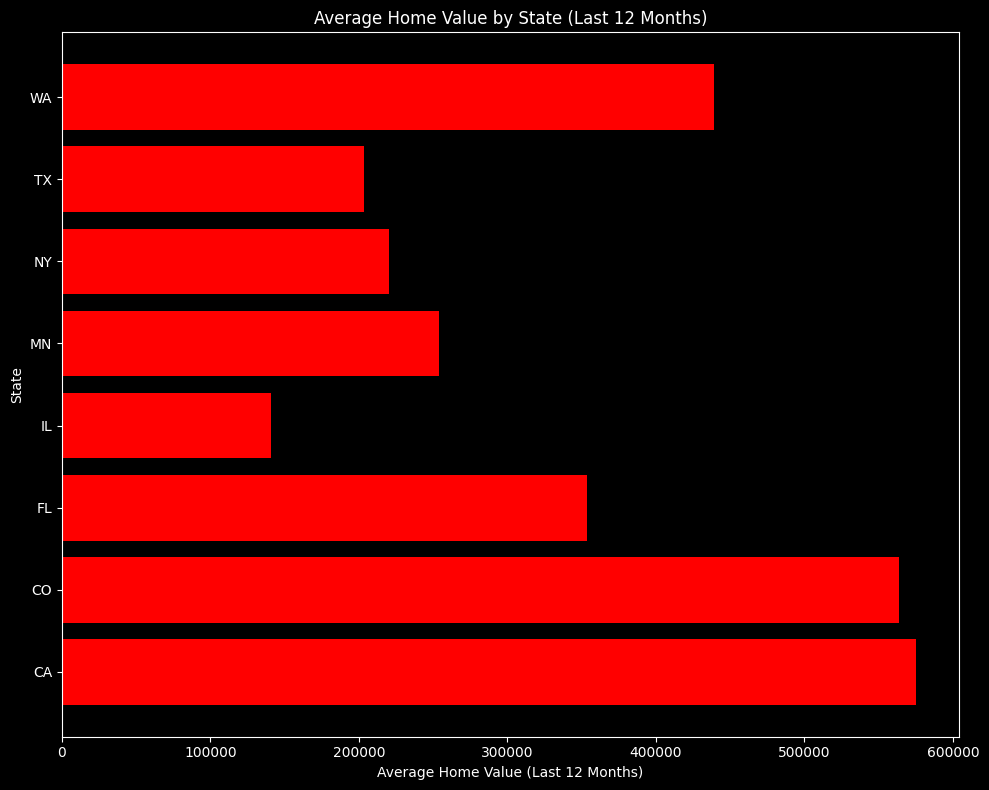

In [11]:
# Plotting the average home values by state
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(state_avg_values['StateName'], state_avg_values['AvgLast12Months'], color='red')
ax.set_xlabel('Average Home Value (Last 12 Months)')
ax.set_ylabel('State')
ax.set_title('Average Home Value by State (Last 12 Months)')

plt.tight_layout()
plt.show()


The horizontal bar chart above illustrates the average home values by state over the last 12 months for the specified states. This visualization provides a clear comparison, with California and Colorado showing the highest average home values among the selected states, followed by Washington, Florida, Minnesota, New York, Texas, and Illinois.

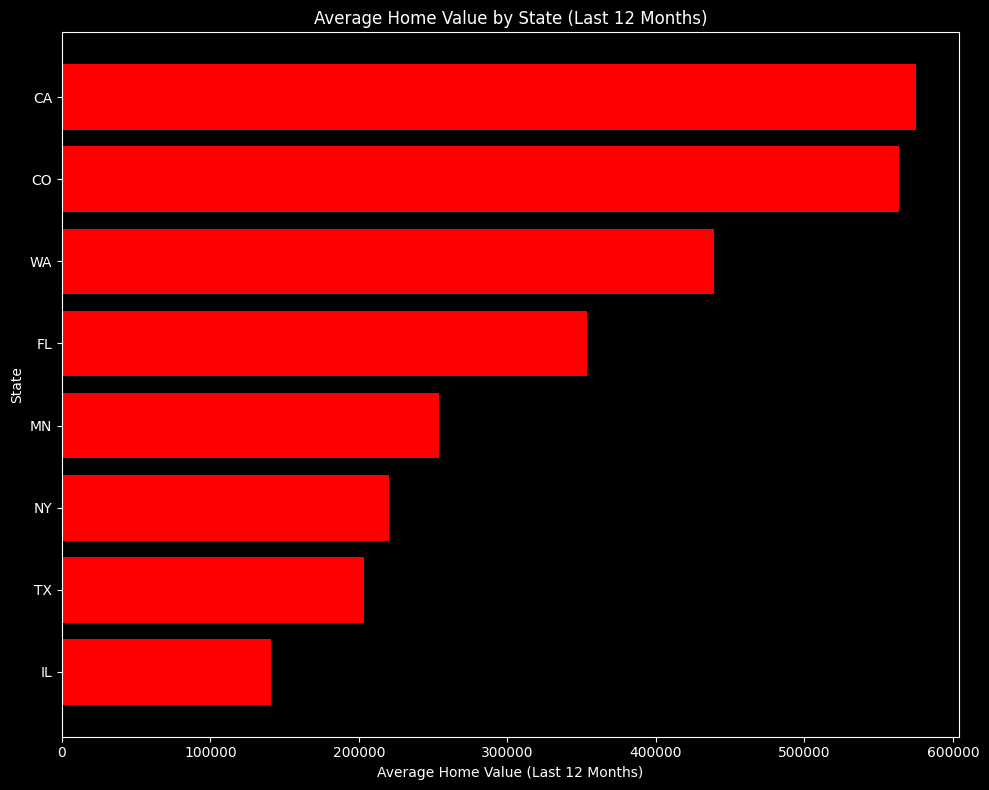

In [12]:
# Sort the data to have the highest values at the top for visualization
state_avg_values_sorted = state_avg_values.sort_values(by='AvgLast12Months', ascending=True)

# Re-plotting with the highest values at the top
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(state_avg_values_sorted['StateName'], state_avg_values_sorted['AvgLast12Months'], color='red')
ax.set_xlabel('Average Home Value (Last 12 Months)')
ax.set_ylabel('State')
ax.set_title('Average Home Value by State (Last 12 Months)')

plt.tight_layout()
plt.show()


The updated horizontal bar chart now displays the states with the highest average home values at the top, making it easier to identify the states with the greatest average home values over the last 12 months. California leads, followed by Colorado, Washington, and the other states as previously detailed.

*RentTrend
The new dataset contains rent price information across different regions in the United States, similar in structure to the previous home value dataset. Here's a summary of its structure:

RegionID: A unique identifier for the region.
SizeRank: A ranking of the region based on size.
RegionName: The name of the region, which could be a city, metropolitan area, etc.
RegionType: The type of region, such as country, metropolitan statistical area (msa), etc.
StateName: The name of the state. This column may contain NaN (missing) values for rows representing aggregate data at the country level.
Monthly columns from 2015-01-31 to 2024-01-31: These columns contain the rent prices for each month over the specified period.
To focus on the rent prices in the last 12 months for the specified states (Florida, California, Texas, New York, Illinois, Washington, Colorado, and Minnesota), we will:

Filter the data for the MSAs that belong to these states.
Calculate the average rent price for each MSA over the last 12 months.
Aggregate these values to get an average rent price per state.
Visualize the data in a horizontal histogram with a dark background and red bars, placing the highest values at the top.
Let's proceed with filtering and calculating the average rent prices for the specified states. ​